In [1]:
%matplotlib inline
import graphs10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
n_graphs = 20
nodes_ini = 10
nodes_end = 150
step = 5
execution_times = np.array(graphs10.time_dijkstra_mg(n_graphs, nodes_ini, nodes_end, step, 1, 0.5))

x = np.array([i for i in range(nodes_ini,nodes_end+1,step)])
x = x.reshape(-1, 1)

lr_m = LinearRegression()
lr_m.fit((x**2)*np.log2(x), execution_times)

predicted_times = lr_m.predict((x**2)*np.log2(x))


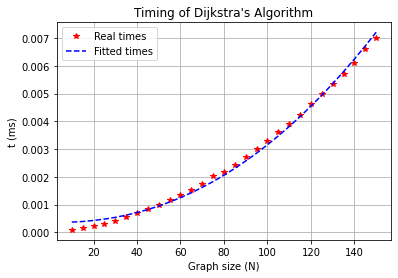

In [3]:
plt.title("Timing of Dijkstra's Algorithm")
plt.xlabel("Graph size (N)")
plt.ylabel("t (ms)")
plt.grid(True)
plt.plot(x, execution_times, '*r', x, predicted_times, '--b')
plt.legend(['Real times', 'Fitted times'])
plt.savefig('graph1.png', transparent=False)

In [9]:
n_graphs = 20
step = 5

ps = [0.1*i for i in range(1,10)]
times_per_prob = []

for p in ps:
    times_per_prob.append(graphs10.time_dijkstra_mg(20, 60, 60, 1, 1, p)[0])

ps = np.array(ps)
ps = ps.reshape(-1, 1)

lr_m = LinearRegression()
lr_m.fit(ps, times_per_prob)

predicted_times = lr_m.predict(ps)


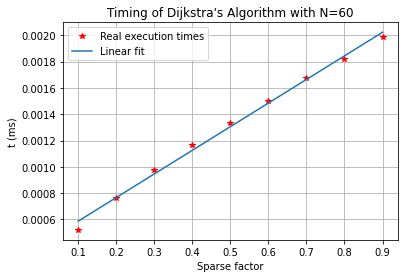

In [11]:
plt.title("Timing of Dijkstra's Algorithm with N=60")
plt.xlabel("Sparse factor")
plt.ylabel("t (ms)")
plt.grid(True)
plt.plot(ps, times_per_prob, '*r', ps, predicted_times)
plt.legend(['Real execution times', 'Linear fit'])
plt.savefig('graph2.png', transparent=False)

In [14]:
n_graphs = 10
nodes_ini = 10
nodes_end = 100
step = 5

times_dallpairs = np.array(graphs10.time_dijkstra_mg_all_pairs(n_graphs, nodes_ini, nodes_end, step, 1, 0.9))
times_fw = np.array(graphs10.time_floyd_warshall(n_graphs, nodes_ini, nodes_end, step, 0.9))

x = np.array([i for i in range(nodes_ini,nodes_end+1,step)])
x = x.reshape(-1, 1)

lr_m = LinearRegression()
lr_m.fit((x**3)*np.log2(x), times_dallpairs)
predicted_times_dallpairs = lr_m.predict((x**3)*np.log2(x))
lr_m.fit(x**3, times_fw)
predicted_times_fw = lr_m.predict(x**3)

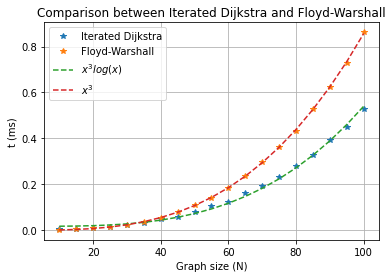

In [15]:
plt.title("Comparison between Iterated Dijkstra and Floyd-Warshall")
plt.xlabel("Graph size (N)")
plt.ylabel("t (ms)")
plt.grid(True)
plt.plot(x, times_dallpairs, '*', x, times_fw, '*', x, predicted_times_dallpairs, '--', x, predicted_times_fw, '--')
plt.legend(['Iterated Dijkstra', 'Floyd-Warshall', '$x^3log(x)$', '$x^3$'])
plt.savefig('graph3.png', transparent=False)